In [1]:
cd downloads

C:\Users\Owner\downloads


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
#Downloading training data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

#Downloading test data
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

#Class labels

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


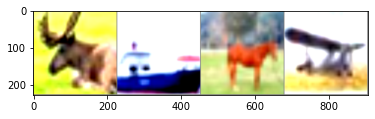

 Deer  Ship Horse Airplane


In [5]:
import matplotlib.pyplot as plt
import numpy as np

#Function to show some random images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

#Model description
#AlexNet_model.features()

Using cache found in C:\Users\Owner/.cache\torch\hub\pytorch_vision_v0.6.0


In [9]:
from keras.preprocessing import image
from sklearn.cluster import KMeans
alex_net_feature_list = []
for i, data in enumerate(trainloader, 0):
    img_data,_ = data
    AlexNet_model_features = AlexNet_model.features(img_data)
    alex_net_feature_np = AlexNet_model_features.detach().numpy()
    alex_net_feature_list.append(alex_net_feature_np.flatten())

alex_net_feature_list_np = np.array(alex_net_feature_list)
kmeans = KMeans(n_clusters=2, random_state=0).fit(alex_net_feature_list_np)

In [10]:
y_kmeans = kmeans.fit_predict(alex_net_feature_list_np)
print(y_kmeans)
print(alex_net_feature_list_np)

[1 0 1 ... 1 1 0]
[[0.         0.         0.         ... 0.02620908 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.4227831  1.4227831  0.74954665]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.32791498 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


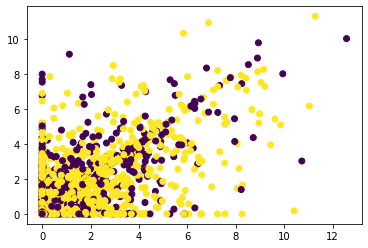

In [11]:
import matplotlib.pyplot as plt
plt.scatter(alex_net_feature_list_np[:, 0], alex_net_feature_list_np[:, 1], c=y_kmeans)